In [1]:
# Import neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the uploaded Excel file
df = pd.read_excel(r"C:\Users\hp\Downloads\Subsidy Disbursements.xlsx",
                sheet_name= 'subsidy_disbursements')

df.head()

,National_ID,Age,Gender,Region,Income_Level,Household_Dependents,Monthly_Energy_Consumption_kWh,Subsidy_Eligibility,Subsidy_Type,Amount (NGN),Channel,Date,Wallet_Activity_Status,Wallet_Balance (NGN),Days_Since_Last_Transaction,Avg_Monthly_Wallet_Balance,Suspected_Fraud
0,ID00001,56,Male,Lagos,Low,4,151,1,Food,2977,Mobile Wallet,2022-01-04,Active,4373.0,16.0,5986.0,0
1,ID00001,56,Male,Lagos,Low,4,151,1,Food,2689,Bank Account,2020-12-20,NaN,NaN,NaN,NaN,0
2,ID00001,56,Male,Lagos,Low,4,151,1,Food,3251,Mobile Wallet,2022-06-05,Active,3353.0,76.0,2276.0,0
3,ID00001,56,Male,Lagos,Low,4,151,1,Cash Transfer,6065,Mobile Wallet,2021-05-23,Active,5090.0,55.0,4347.0,0
4,ID00001,56,Male,Lagos,Low,4,151,1,Food,3201,Mobile Wallet,2023-09-17,Inactive,7870.0,3.0,5906.0,0


In [3]:
# Basic Info & Summary

print("\n📌 Dataset Info:")
print(df.info())

print("\n📌 Summary Statistics:")
print(df.describe(include="all"))


📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80025 entries, 0 to 80024
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   National_ID                     80025 non-null  object        
 1   Age                             80025 non-null  int64         
 2   Gender                          80025 non-null  object        
 3   Region                          80025 non-null  object        
 4   Income_Level                    80025 non-null  object        
 5   Household_Dependents            80025 non-null  int64         
 6   Monthly_Energy_Consumption_kWh  80025 non-null  int64         
 7   Subsidy_Eligibility             80025 non-null  int64         
 8   Subsidy_Type                    80025 non-null  object        
 9   Amount (NGN)                    80025 non-null  int64         
 10  Channel                         80025 non-null  objec

### Data Cleaning

In [4]:
# Step 1: Check for missing values

print("\n📌 Missing Values:")
print(df.isnull().sum())


📌 Missing Values:
National_ID                           0
Age                                   0
Gender                                0
Region                                0
Income_Level                          0
Household_Dependents                  0
Monthly_Energy_Consumption_kWh        0
Subsidy_Eligibility                   0
Subsidy_Type                          0
Amount (NGN)                          0
Channel                               0
Date                                  0
Wallet_Activity_Status            53337
Wallet_Balance (NGN)              53337
Days_Since_Last_Transaction       53337
Avg_Monthly_Wallet_Balance        53337
Suspected_Fraud                       0
dtype: int64


In [5]:
# Step 2: Standardize column names

df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
df.columns

Index(['national_id', 'age', 'gender', 'region', 'income_level',
       'household_dependents', 'monthly_energy_consumption_kwh',
       'subsidy_eligibility', 'subsidy_type', 'amount_(ngn)', 'channel',
       'date', 'wallet_activity_status', 'wallet_balance_(ngn)',
       'days_since_last_transaction', 'avg_monthly_wallet_balance',
       'suspected_fraud'],
      dtype='object')

In [6]:
# Step 3: Handle missing values

# Drop rows with all NaN values
df = df.dropna(how="all")

# Fill missing numeric values with 0
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
df[num_cols] = df[num_cols].fillna(0)

# Fill missing text with "Unknown"
obj_cols = df.select_dtypes(include=["object"]).columns
df[obj_cols] = df[obj_cols].fillna("Unknown")

In [7]:
# Step 4: Check how many duplicates exist

duplicate_count = df.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


In [8]:
# Step 5: Clean numeric columns

for col in num_cols:
    # Remove commas, convert to numeric
    df[col] = df[col].astype(str).str.replace(",", "").str.replace("₦", "").str.strip()
    df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)
    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80025 entries, 0 to 80024
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   national_id                     80025 non-null  object        
 1   age                             80025 non-null  int64         
 2   gender                          80025 non-null  object        
 3   region                          80025 non-null  object        
 4   income_level                    80025 non-null  object        
 5   household_dependents            80025 non-null  int64         
 6   monthly_energy_consumption_kwh  80025 non-null  int64         
 7   subsidy_eligibility             80025 non-null  int64         
 8   subsidy_type                    80025 non-null  object        
 9   amount_(ngn)                    80025 non-null  int64         
 10  channel                         80025 non-null  object        
 11  da

### Exploratory Data Analysis

In [9]:
# Create a flag for subsidy receipt (assuming Amount > 0 means received)
df['received_subsidy'] = (df['amount_(ngn)'] > 0).astype(int)

In [10]:
# 1. Subsidy Coverage Rate

eligible = df[df['subsidy_eligibility'] == 1]
coverage_rate = eligible['received_subsidy'].mean()

print(f"Subsidy Coverage Rate: {coverage_rate:.2%}")

Subsidy Coverage Rate: 100.00%


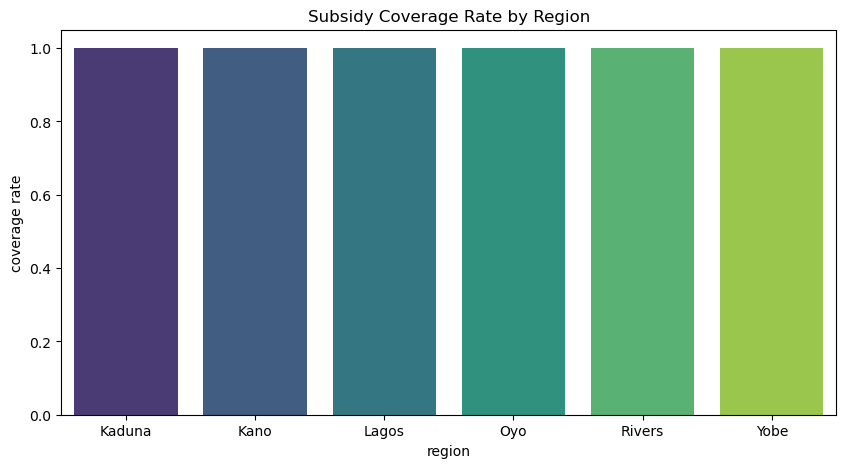

In [16]:
# Calculate subsidy coverage by region
region_coverage = df.groupby('region').apply(lambda x: (x['received_subsidy'].sum() / x.shape[0])).reset_index(name='coverage_rate')

# Plot subsidy coverage by region
plt.figure(figsize=(10,5))
sns.barplot(data=region_coverage.sort_values('coverage_rate', ascending=False), x='region', 
                 y='coverage_rate', palette="coolwarm")

plt.title('Subsidy Coverage Rate by Region')
plt.ylabel('coverage rate')
plt.xlabel('region')

plt.show()

In [11]:
# 2. Targeting Accuracy: % of subsidy funds reaching low-income group

total_subsidy = df['amount_(ngn)'].sum()
low_income_subsidy = df[df['income_level'] == 'Low']['amount_(ngn)'].sum()
targeting_accuracy = low_income_subsidy / total_subsidy

print(f"Targeting Accuracy (Low income share of subsidy): {targeting_accuracy:.2%}")

Targeting Accuracy (Low income share of subsidy): 60.98%


Leakage Rate: 39.02%


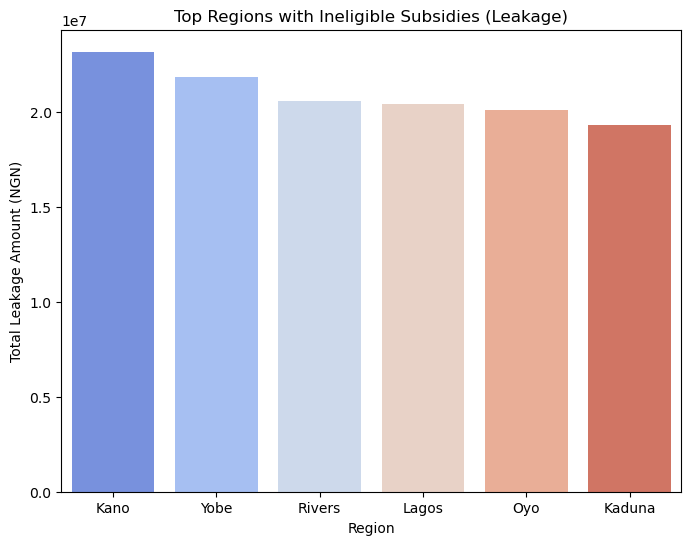

In [12]:
# 3. Leakage Analysis

# Leakage Rate: % subsidy to ineligible or non-low income
leakage_df = df[(df['income_level'] != 'Low') & (df['received_subsidy'] == 1)]
leakage_amount = leakage_df['amount_(ngn)'].sum()

leakage_rate = leakage_amount / total_subsidy
print(f"Leakage Rate: {leakage_rate:.2%}")

# Top Regions with Leakage
leakage_by_region = leakage_df.groupby('region')['amount_(ngn)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x=leakage_by_region.index, y=leakage_by_region.values, palette='coolwarm')
plt.title("Top Regions with Ineligible Subsidies (Leakage)")

plt.ylabel("Total Leakage Amount (NGN)")
plt.xlabel("Region")

plt.show()

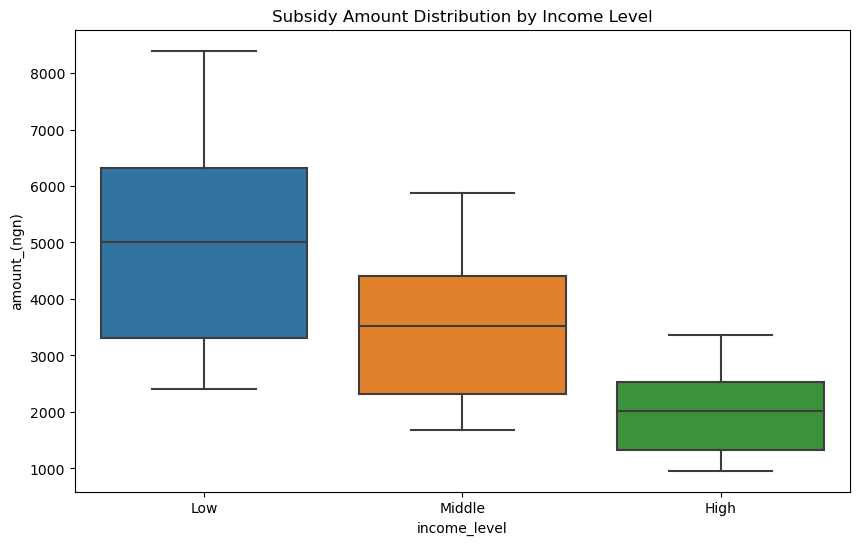

In [17]:
# 4. Distribution of subsidy amount by Income Level
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='income_level', y='amount_(ngn)')
plt.title('Subsidy Amount Distribution by Income Level')

plt.show()

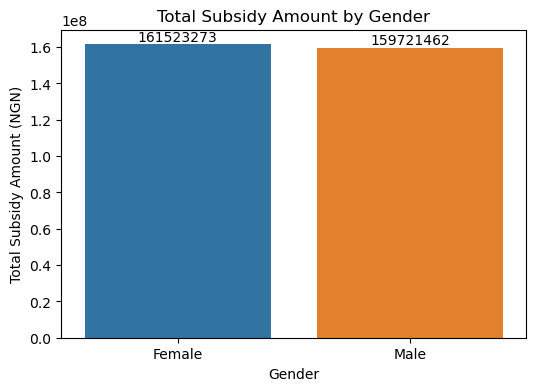

In [18]:
# 5. Subsidy distribution by Gender
gender_subsidy = df.groupby('gender')['amount_(ngn)'].sum().reset_index()

plt.figure(figsize=(6,4))
ax = sns.barplot(data=gender_subsidy, x='gender', y='amount_(ngn)')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')  # no decimals

plt.title('Total Subsidy Amount by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Subsidy Amount (NGN)')
plt.show()

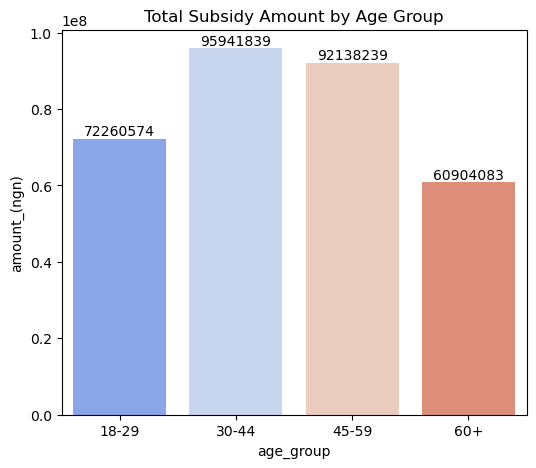

In [19]:
# 6. Subsidy distribution by Age Group

# Create age bins
bins = [18, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

age_subsidy = df.groupby('age_group')['amount_(ngn)'].sum().reset_index()
plt.figure(figsize=(6,5))
ax = sns.barplot(data=age_subsidy, x='age_group', y='amount_(ngn)', palette="coolwarm")

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
    
plt.title('Total Subsidy Amount by Age Group')

plt.show()

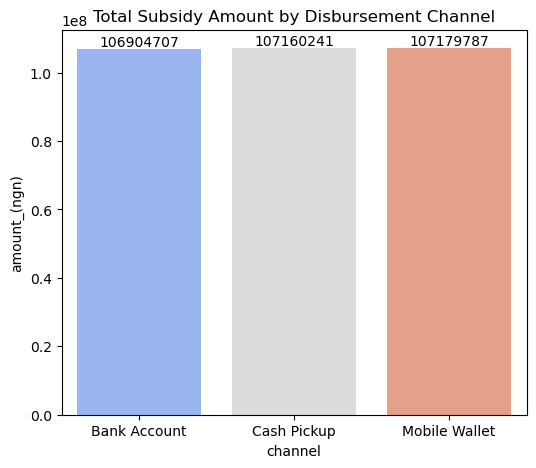

In [20]:
# 7. Subsidy distribution by Channel

channel_subsidy = df.groupby('channel')['amount_(ngn)'].sum().reset_index()
plt.figure(figsize=(6,5))
ax = sns.barplot(data=channel_subsidy, x='channel', y='amount_(ngn)', palette="coolwarm")

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
    
plt.title('Total Subsidy Amount by Disbursement Channel')
plt.show()

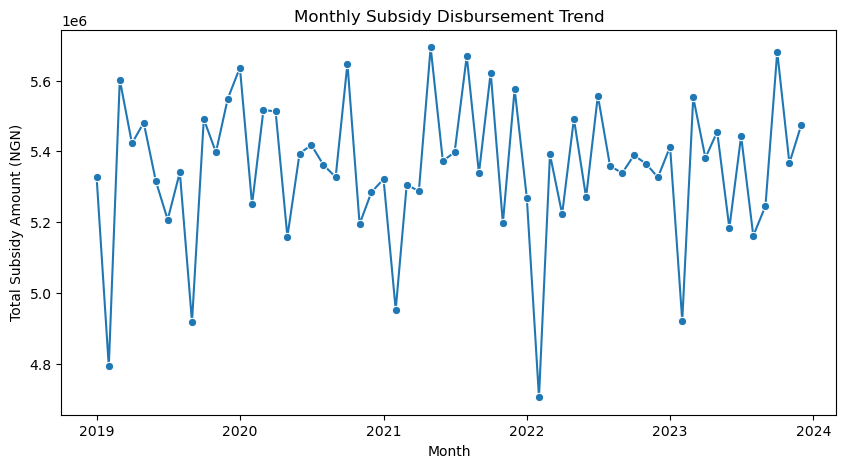

In [21]:
# 8. Monthly Subsidy Trend

# Create Year-Month column
df['year_month'] = df['date'].dt.to_period('M')

# Aggregate by month
monthly_subsidy = df.groupby('year_month')['amount_(ngn)'].sum().reset_index()

# Convert Period to Timestamp for plotting
monthly_subsidy['year_month'] = monthly_subsidy['year_month'].dt.to_timestamp()

# Plot trend
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_subsidy, x='year_month', y='amount_(ngn)', marker="o")
plt.title('Monthly Subsidy Disbursement Trend')
plt.xlabel('Month')
plt.ylabel('Total Subsidy Amount (NGN)')
plt.show()

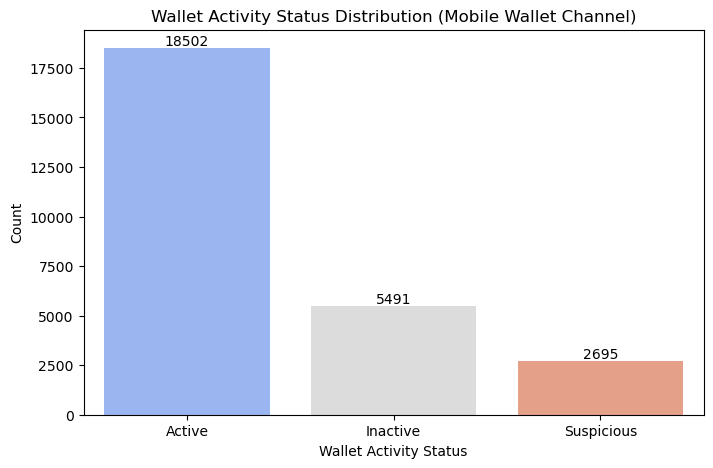

In [22]:
# 9. Wallet Activity Status distribution (only for Mobile Wallet channel)

wallet_df = df[df['channel'] == 'Mobile Wallet']
wallet_status_counts = wallet_df['wallet_activity_status'].value_counts(dropna=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x=wallet_status_counts.index, y=wallet_status_counts.values, palette='coolwarm')

# Add labels on top of bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f')
    
plt.title('Wallet Activity Status Distribution (Mobile Wallet Channel)')
plt.ylabel('Count')
plt.xlabel('Wallet Activity Status')
plt.show()

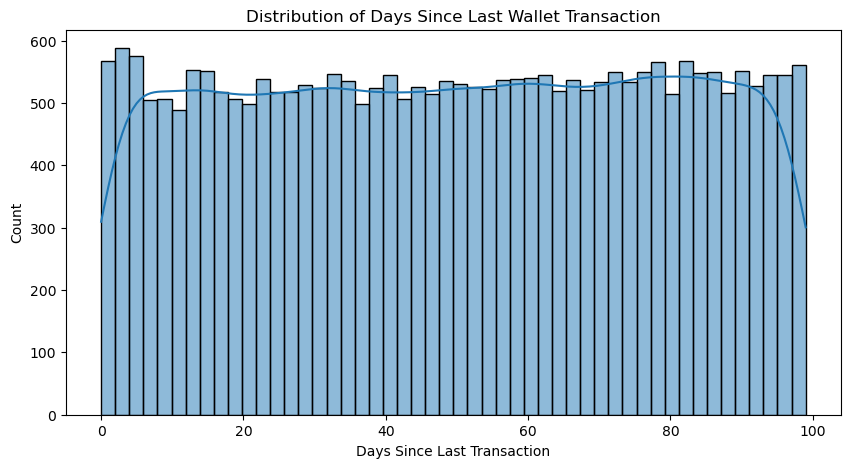

In [23]:
# 10. Behavioral misuse patterns: Days since last transaction distribution

plt.figure(figsize=(10,5))
sns.histplot(wallet_df['days_since_last_transaction'].dropna(), bins=50, kde=True)
plt.title('Distribution of Days Since Last Wallet Transaction')
plt.xlabel('Days Since Last Transaction')
plt.show()

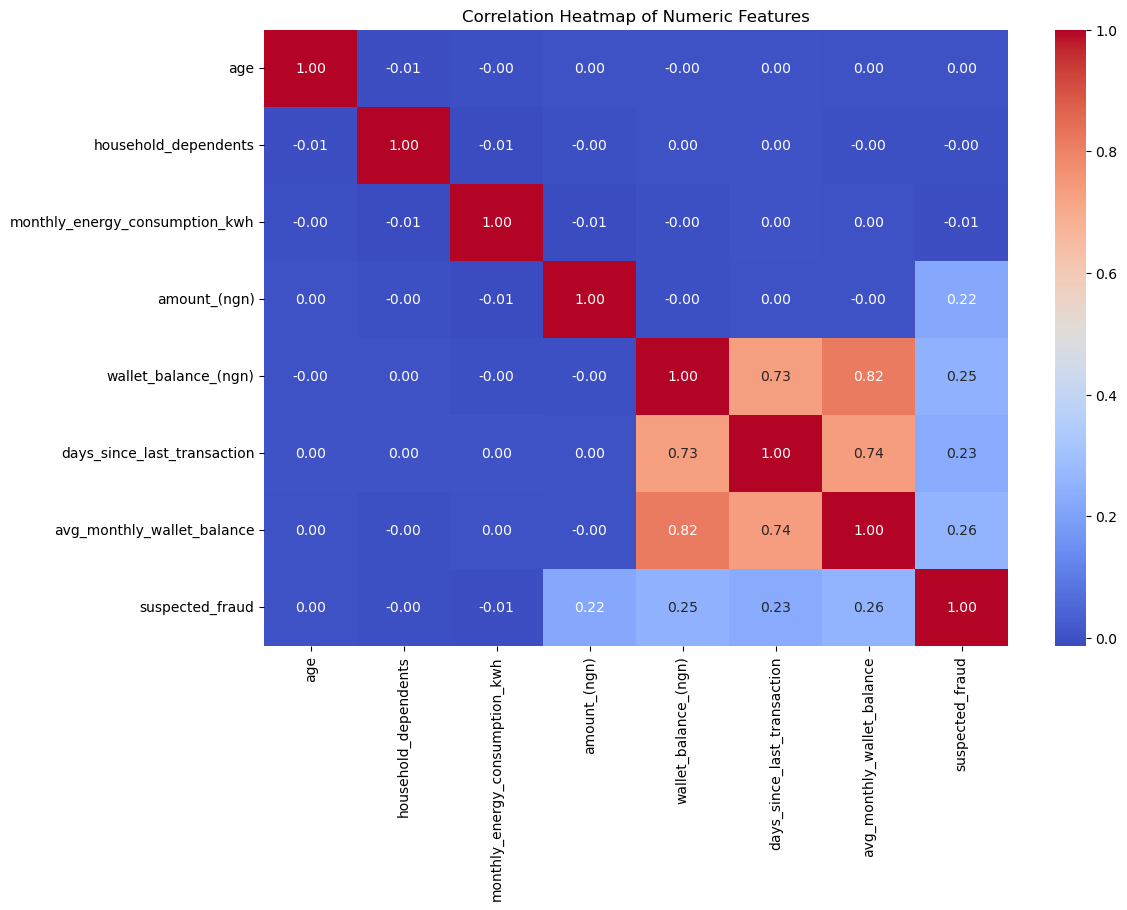

In [25]:
# 11. Correlation heatmap for numeric features

numeric_cols = ['age', 'household_dependents', 'monthly_energy_consumption_kwh', 'amount_(ngn)', 'wallet_balance_(ngn)', 
                'days_since_last_transaction', 'avg_monthly_wallet_balance', 'suspected_fraud']
plt.figure(figsize=(12,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numeric Features')
          
plt.show()

In [26]:
# Key Insight Summary
# Generate Report
print("\n=== KEY INSIGHTS ===")
print(f"1. {coverage_rate:.2f}% of eligible households received subsidies.")
print(f"2. {leakage_rate:.2f}% of subsidies leaked to non-low-income groups.")
print(f"3. Top leakage regions: {leakage_by_region.index.tolist()}")
print(f"4. Average subsidy for low-income: {df[df['income_level'] == 'Low']['amount_(ngn)'].mean():.2f} ngn")



=== KEY INSIGHTS ===
1. 1.00% of eligible households received subsidies.
2. 0.39% of subsidies leaked to non-low-income groups.
3. Top leakage regions: ['Kano', 'Yobe', 'Rivers', 'Lagos', 'Oyo', 'Kaduna']
4. Average subsidy for low-income: 5014.35 ngn


In [27]:
# Step 6: Save cleaned data
df.to_csv("Cleaned_Subsidy_Disbursements.csv", index=False)

print("✅ Cleaning done! Saved as Cleaned_Subsidy_Disbursements.csv")

✅ Cleaning done! Saved as Cleaned_Subsidy_Disbursements.csv


In [ ]:
# Explanation:

- **Coverage Rate, Targeting Accuracy, Leakage Rate**: Basic KPIs calculated and printed.
- **Barplots and Boxplots**: Show subsidy distribution by region, income, gender, age, and channel.
- **Time Series**: Monthly subsidy trends.
- **Wallet Activity**: Distribution of wallet statuses and days since last transaction.
- **Correlation Heatmap**: Numeric feature relationships.